# Закономерности, объясняющие успешность игры.

Имеется таблица с данными о продаже игр на разных платформах за разные года.

Необходимо дать ответы на вопросы:
- Определить актуальный период для игровой индустрии
- Выявить платформы с наибольшими продажами 
- Выявить потенциально прибыльные платформы
- Посмотреть на распределение глобальных продаж игр в разбивке по платформам
- Выявить, как влияют оценки критиков и оценки пользователей на продажи игры
- Посмотреть на распределение жанров и выявить игры с большими и низкими продажами

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from math import sqrt
from scipy.stats import binom, norm
from math import factorial

sns.set(rc={'figure.figsize':(10,7)})

## Загрузка данных

In [2]:
data = pd.read_csv('/datasets/games.csv') # прочитаем файл с данными
data.head(15) # выведем первые строки данных, чтобы ознакомиться с ними

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info() # посмотрим основную информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.columns = data.columns.str.lower() # приведём названия солбцов к нижннему регистру для более удобной работы
data.head() # проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# посмотрим на уникальные значение некоторых столбцов
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Вывод
- Название столбцов приведены к единому формату.
- Видно, что присутствует достаточно большое количество пропусков.
- Необходимо привести к формату int столбец 'year_of_release'.
- Столбец critic_score следует привести к типу int.
- Столбец user_score следует привести к типу float.

## Предобработка данных

### Преобразование типов

В столбце 'user_score' пристуствует значение 'tbd', что в переводе на русский означает 'будет определено'. Бывает, что игры оценивают очень долго, так как это не быстрый процесс. При преобразоватии типа заменим данное значение на NaN.

In [11]:
# приведем данные в столбцах к нужному виду
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float') # значение 'tbd' заменим на nan
data['critic_score'] = pd.to_numeric(data['critic_score'], downcast = 'integer', errors = 'coerce')

### Пропуски

In [12]:
# посмотрим на количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [13]:
# посмотрим строки с пропусками в столбце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# пропуски в name совпадают с пропусками в genre
# скорее всего, это одна и та же игра
# данные строки можно удалить, так как без жанра игры и без оценок она нам мало что даст
data = data.dropna(subset=['name'])
data.isna().sum() # проверим

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [15]:
# посмотрим на строки с пропущенным годом
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
# удаляем эти строки
data = data.dropna(subset=['year_of_release'])

data.isna().sum() # проверим

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [17]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Можно заметить, что в строках, где присутствуют пропуски в столбце 'critic_score' совпадают со строками, где присутствуют пропуски в столбце 'user_score'. Пропуски оставим, так как их нечем заполнить. 

In [18]:
# заполним пропуски в столбце rating значение unknown
data['rating'] = data['rating'].fillna('unknown')

In [19]:
# проверим
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Дубликаты

In [20]:
# проверим на наличие явных дубликатов
data.duplicated().sum()

0

In [21]:
# далее проверим на наличие неполных дубликатов
# нас будут интересовать столбцы с категориальными переменными: name, platform 
dupl = data.copy()
dupl['name'] = dupl['name'].str.lower()
dupl['platform'] = dupl['platform'].str.lower()

dupl.duplicated(subset=['name', 'platform']).sum()

3

In [22]:
# неполные дубликаты присутствуют
# выведем эти строки на экран

dupl[dupl.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,need for speed: most wanted,x360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,need for speed: most wanted,pc,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,need for speed: most wanted,pc,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,madden nfl 13,ps3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Явных и неявных дубликатов не обнаружено.

### Аномальные значения (выбросы)

In [23]:
# проверим разброс данных при помощи функции describe
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Странно выглядит то, что практически у половины игр значения в столбцах с продажами равны 0. Думаю, что данные значения обусловлены тем, что в данных регионах игры конкретные игры не продавались.

### Суммарные продажи

In [24]:
# добавим новый столбец, содержащий в себе значение суммарных продаж каждой игры
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


### Вывод
По итогам предобработки данных:
1. Произвелось преобразование типов данных:
- столбец 'year_of_release' к типу int
- столбец 'user_score' к типу float
- столбец 'critic_score' к типу int
2. Было выявлено наличие пропусков. Большинство пропусков было решено оставить, так как заменить пропуски нечем. Они могли появиться в следствие неправльной записи данных / загрузке, выгрузке или сохранении данных / технической ошибки.
3. В столбце 'user_score' присутствовало значение 'tbd', что означает 'будет определено'. Вообще, не все игры оцениваются критиками или пользователями, не для всех игр дают оценки. К тому же, этот процесс достаточно длительный. Данные значения были заменены на NaN, так как заменить их какими-то значениями не представляется возможным.
4. Пропуски в столбце 'reting' были заменены на значение моды рейтинга для каждого жанра. 
5. Явных дубликатов и аномальных значений в данных не выявлено. Неполные дубликаты были удалены.

In [25]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

### Количество игр за каждый год

In [26]:
# посмотрим, сколько игр выходило каждый год
year_rel = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count') # создадим сводную таблицу
year_rel                                                                                 # с количеством игр за каждый год

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


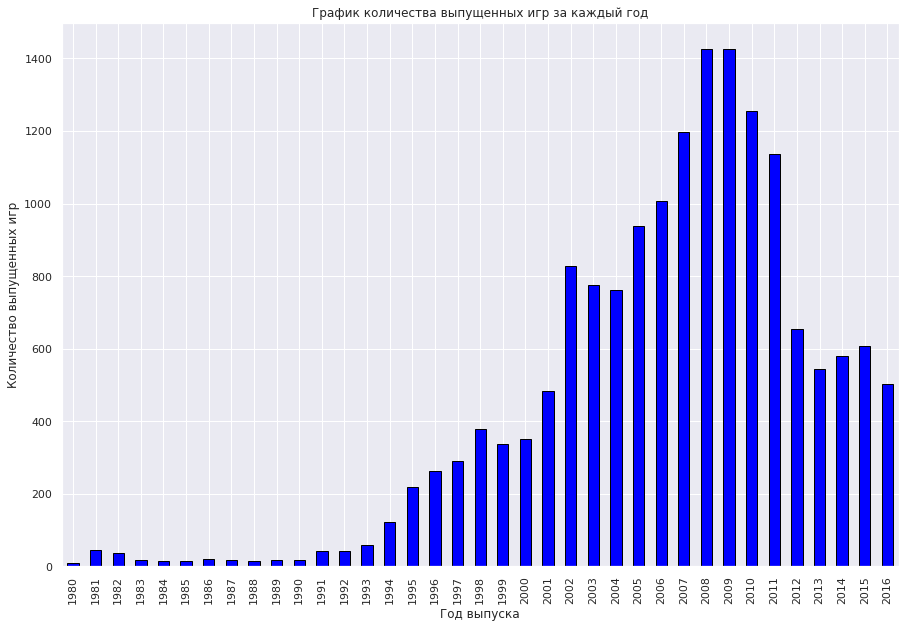

In [27]:
# построим график, чтобы более наглядно ознакомиться с развитием игровой индустрии
year_rel.plot.bar(figsize=(15, 10), color='blue', edgecolor='black', legend=False)
plt.title('График количества выпущенных игр за каждый год')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

#### Вывод:
Можно заметить, что до 1994 года развитие игровой индустрии шло медленно, скорее всего, в следствие недостаточной мощности игровых консолей, а также недостаточной развитости в области разработки игр.

После 1994 год количество выпускаемых игр росло. В 2008 и 2009 года наблюдается пик, после которого идёт спад. Скорее всего, это обусловено тем, что в настоящее время многие разработчики перешли на разработку игр и приложений для телефона, ведь в наши дни человек большее время проводит с телефоном в руках. 

Думаю, что данные до 1994 года можно отбросить в связи с их малым объемом.

In [28]:
# откинем данные до 1994 года
data = data.query('year_of_release > 1993')
data['year_of_release'].min() # проверим

1994

### Продажи по платформам

In [29]:
# посмотрим на наиболее популярные платформы 
platform_sales = pd.pivot_table(data, index='platform', values='all_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values(by='all_sales', ascending=False)
platform_sales

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


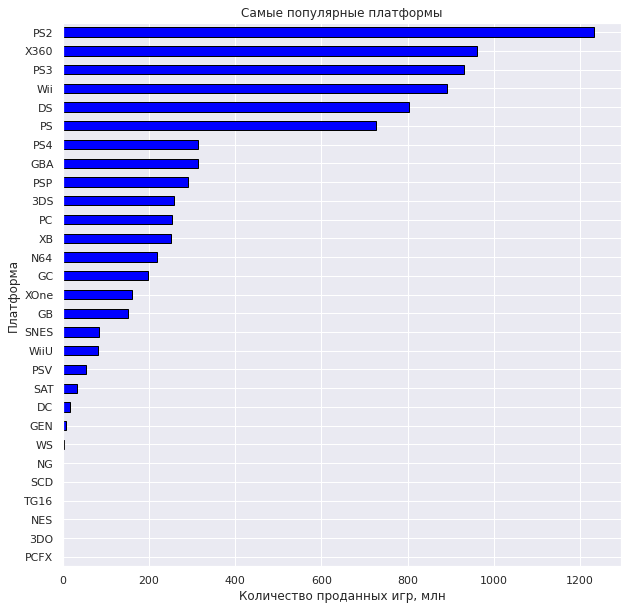

In [30]:
# построим график
platform_sales.sort_values(by='all_sales', ascending=True).plot(kind='barh', figsize=(10, 10), color='blue', edgecolor='black', legend=False)
plt.title('Самые популярные платформы')
plt.xlabel('Количество проданных игр, млн')
plt.ylabel('Платформа')
plt.show()

За самые популярные платформы возьмём первые шесть: от PS2 до PS. Далее идёт сильная просадка.

Самой популярной является платформа PS2.

In [31]:
# рассмотрим распределение по годам у топ-6 популярных платформ
top_6 = data.query('platform == ("PS2", "X360", "Wii", "PS3", "DS", "PS")')
top_6 # взяли таблицу только с топ-6 платформ

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [32]:
# создадим сводную таблицу с распределением продаж по годам
top_6_platform = pd.pivot_table(top_6, index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum')
top_6_platform.head(30)

all_sales
platform year_of_release           
DS       2004                 17.27
         2005                130.14
         2006                119.81
         2007                146.94
         2008                145.31
         2009                119.54
         2010                 85.02
         2011                 26.18
         2012                 11.01
         2013                  1.54
PS       1994                  6.03
         1995                 35.96
         1996                 94.70
         1997                136.17
         1998                169.49
         1999                144.53
         2000                 96.37
         2001                 35.59
         2002                  6.67
         2003                  2.07
PS2      2000                 39.17
         2001                166.43
         2002                205.38
         2003                184.31
         2004                211.81
         2005                160.66
         2006                103.42
         2007                 75.99
         2008                 53.90
         2009                 26.40

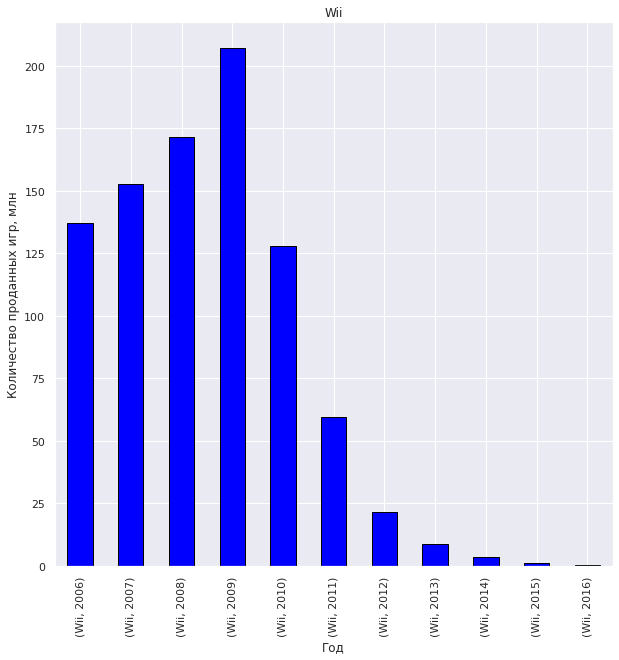

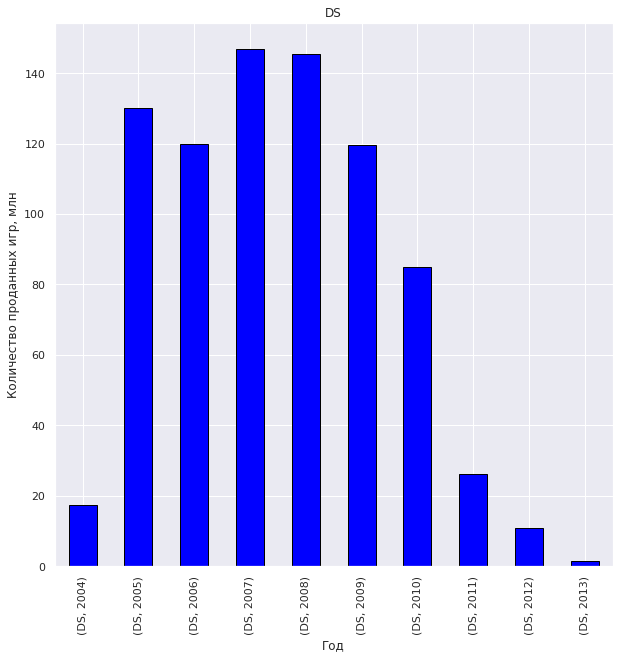

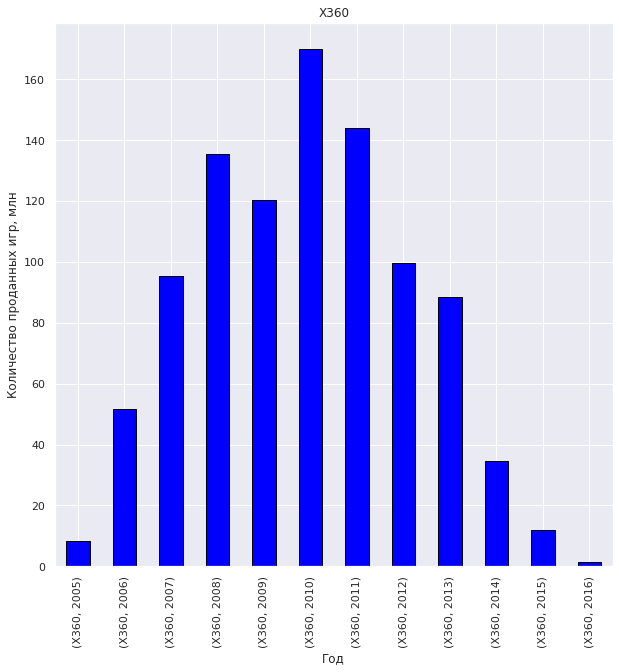

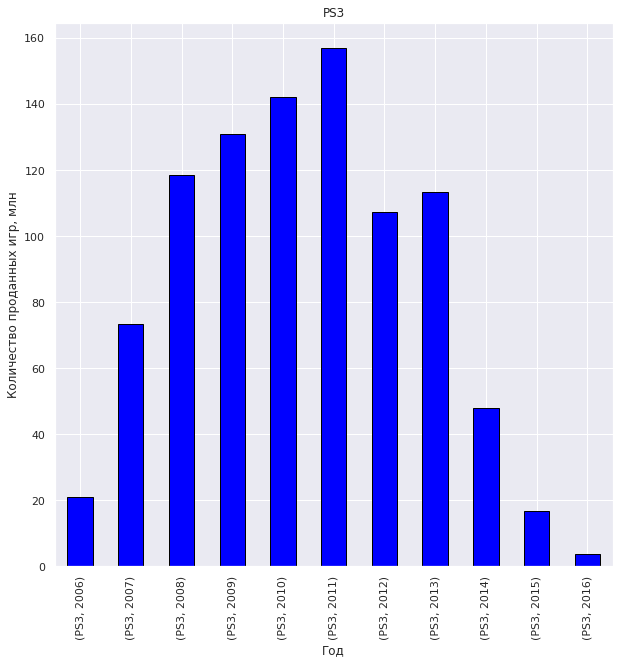

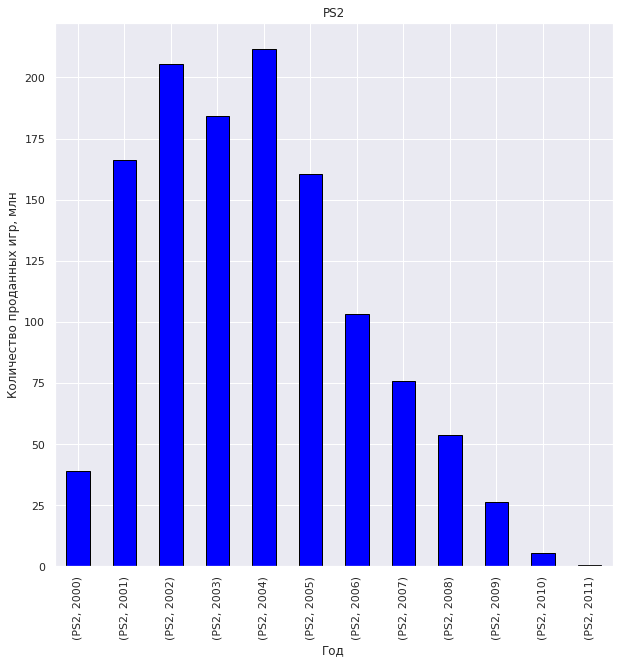

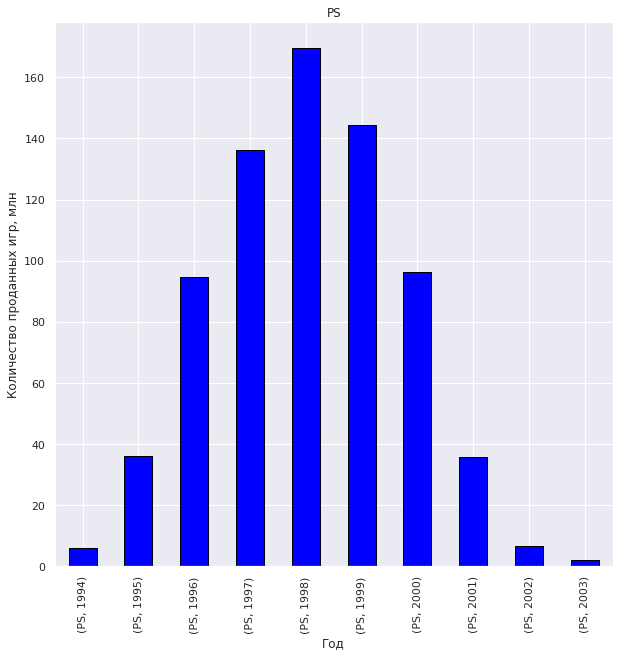

In [33]:
for i in top_6['platform'].unique():
    d = top_6_platform.query('platform == @i')
    d.plot.bar(figsize=(10, 10), color='blue', edgecolor='black', legend=False)
    plt.title(i)
    plt.xlabel('Год')
    plt.ylabel('Количество проданных игр, млн')
    plt.show()

#### Вывод:

- Судя по графикам, можно заметить, что каждая из топ-6 платформ была востребована от 10 до 12 лет.

- Платформа выходит на пик примерно к середине своей "жизни", а далее идёт спад.

- Начиная с 2013 года абсолютно у всех топ-6 платформ низкие показатели, а общие показатели продаж по всем платформам низкие, что говорит нам о платформах новых поколений.

- Для прогноза на 2017 год целесообразно будет принять за актуальный период два года: 2014-2016 (за 2016 год данные неполные)

- Количество проданных игр с 2013 по 2016 года достаточно низкое, скорее всего связано это с тем, что на создание игр для новых платформ требуется намного больше усилий. Современные игры более сложные в производстве. 

### Прогноз потенциально прибыльных платформ

In [34]:
# создадим таблицу с платформами, где дата релиза игр не раньше 2014
new_platform = data.query('year_of_release > 2013')
new_platform['year_of_release'].min() # проверим

2014

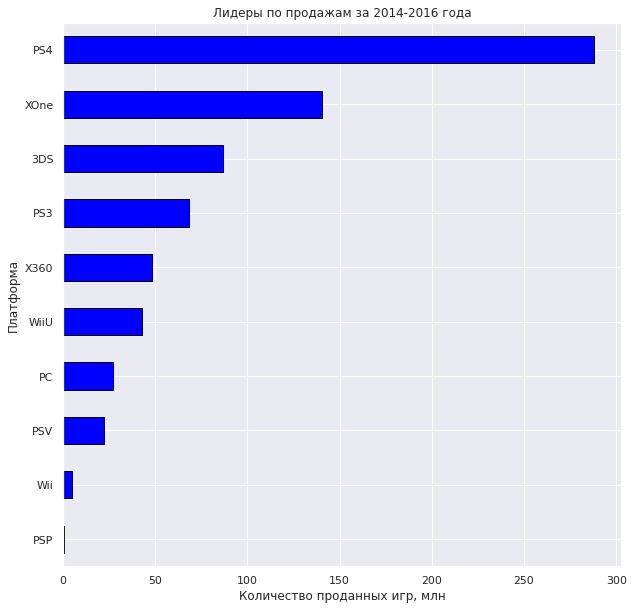

In [35]:
# посмотрим на лидеров продаж за актуальный период
top_new_platform = pd.pivot_table(new_platform, index='platform', values='all_sales', aggfunc='sum')
top_new_platform = top_new_platform.sort_values(by='all_sales')
top_new_platform.plot(kind='barh', figsize=(10, 10), color='blue', edgecolor='black', legend=False)
plt.title('Лидеры по продажам за 2014-2016 года')
plt.xlabel('Количество проданных игр, млн')
plt.ylabel('Платформа')
plt.show()

Можно выделить 5 платформ в лидерах: PS4, PS3, XOne, 3DS, X360, WiiU, PC. Но явный лидер сразу очевиден - PS4.

Необходимо построить графики продаж по годам среди лидеров.

In [36]:
new_platform = new_platform[new_platform['platform'].isin(['PS4','XOne','PC','WiiU','3DS', 'PSV', 'X360', 'PS3'])]
top_new_platform = pd.pivot_table(new_platform, index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum')

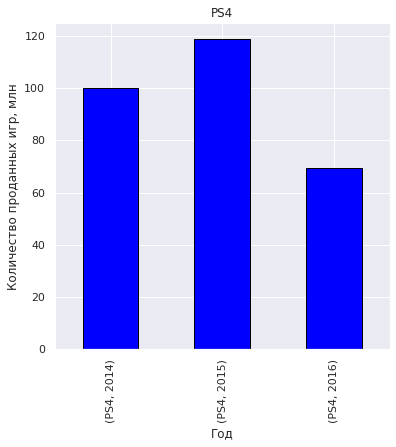

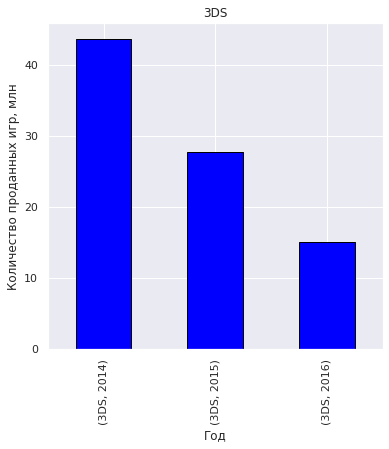

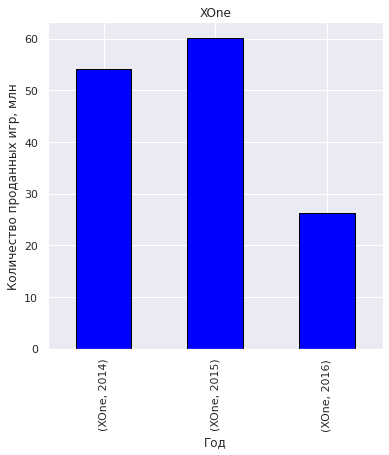

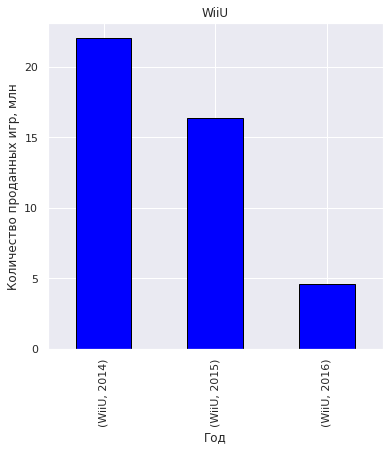

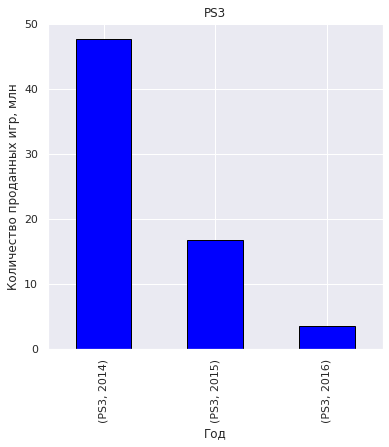

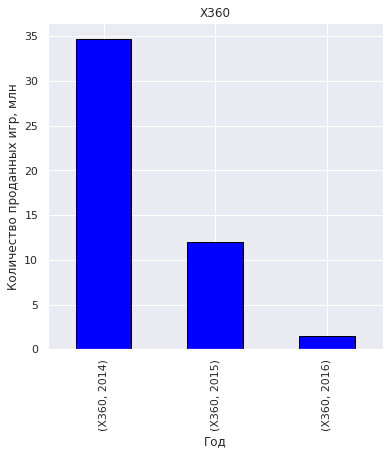

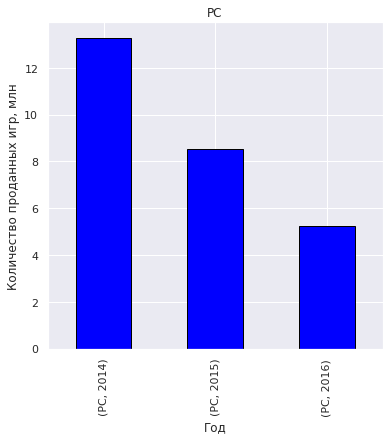

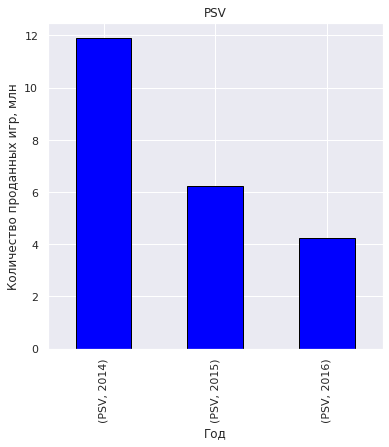

In [37]:
# построим графики распределения
for i in new_platform['platform'].unique():
    d = top_new_platform.query('platform == @i')
    d.plot.bar(figsize=(6, 6), color='blue', edgecolor='black', legend=False)
    plt.title(i)
    plt.xlabel('Год')
    plt.ylabel('Количество проданных игр, млн')
    plt.show()

#### Вывод:
- Судя по графикам, продажи растут у двух платформ: PS4 и XOne. Думаю, что они являются самыми потенциально прибыльными.

- Стоит также отметить платформы 3DS и PC: у первой платформы за 2015 год около 28 млн продаж, поэтому можно ожидать, что и в 2016, и в 2017 у неё будут тоже высокие продажи. Но тем не менее, они постепенно падают. Продажи игр на персональный компьютер падают, но, тем не менее, данная платформа остается востребована уже несколько десятилетий, поэтому она тоже является потенциально прибыльной, пусть и не имея огромных продаж.

- У остальных платформ продажи падают.

### Глобальные продажи игр в разбивке по платформам

count    1665.000000
mean        0.434847
std         1.061983
min         0.010000
25%         0.030000
50%         0.100000
75%         0.360000
max        14.630000
Name: all_sales, dtype: float64

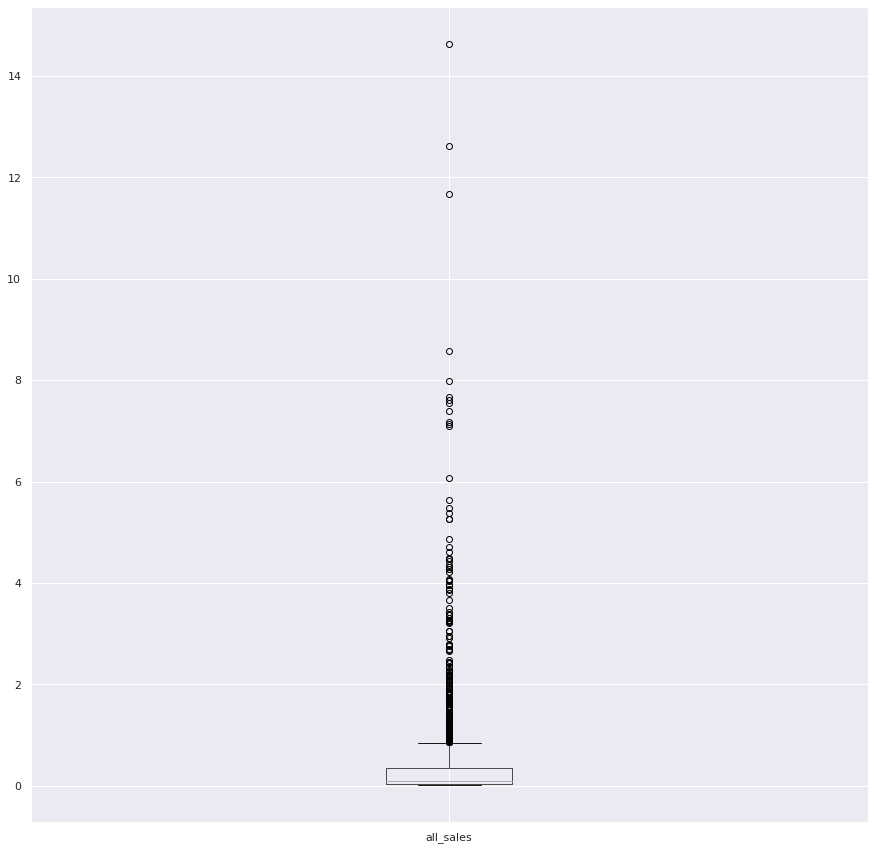

In [38]:
# построим график "ящик с усами" по глобальным продажам игр по всем топ платформам

new_platform.boxplot(column = 'all_sales', figsize = (15, 15))
new_platform['all_sales'].describe()

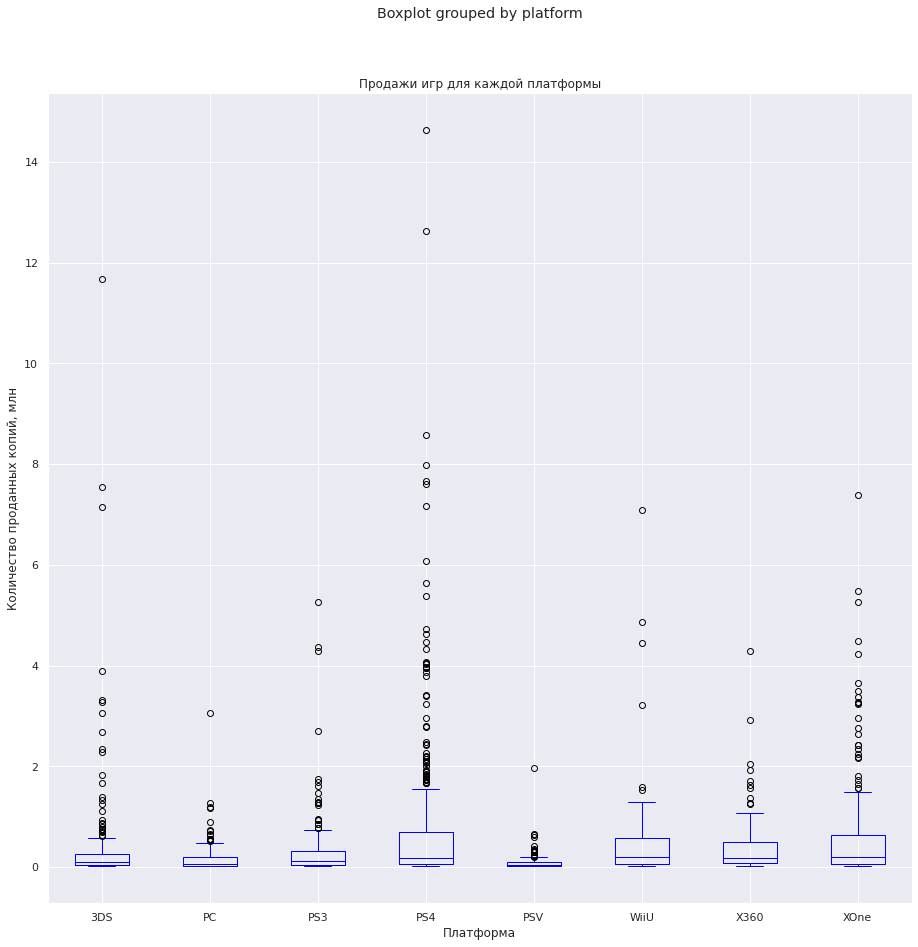

In [39]:
# построим и сравним графики отдельно для каждой платформы в 100% масштабе
new_platform.boxplot(column = 'all_sales', by='platform', figsize = (15, 15), color='blue')
plt.title('Продажи игр для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.show()

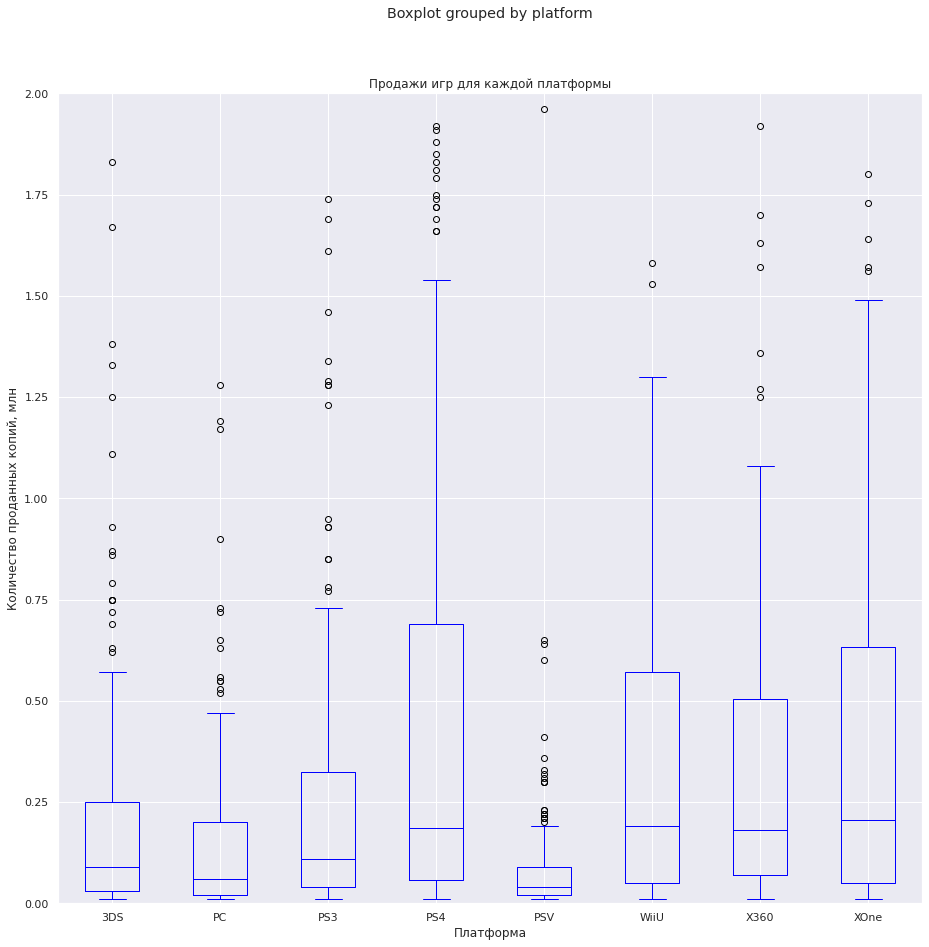

In [40]:
# теперь посмотрим на нижнюю часть графика, чтобы наглядно посмотреть на медианы и квантили
new_platform.boxplot(column = 'all_sales', by='platform', figsize = (15, 15), color='blue')
plt.title('Продажи игр для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.ylim(0, 2)
plt.show()

#### Вывод:

Для каждой платформы медианное значение:
- PS4 - 170 тыс
- 3DS - 90 тыч
- XOne - 200 тыс
- WiiU - 190 тыс
- PC - 70 тыс
- PSV - 40 тыс

Также можно заметить, что в графике для каждой платформы присутствуют аномальные значения: скорее всего, это очень популярные игры либо игры, которые были доступны по акции илл вовсе бесплатно.

Также есть и игры, продажи которых уж совсем маленькие (10 тыс). Это, вероятно, игры, которые создавались для определенного круга людей, так сказать, "специфические" игры.

### Влияние отзывов критиков и покупателей на продажи 

In [41]:
# в качестве примера возьмём платформу XOne
xone = new_platform.query('platform == "XOne"')
xone['platform'].unique() # проверим, верно ли получился срез

array(['XOne'], dtype=object)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции равен 0.42867694370333226


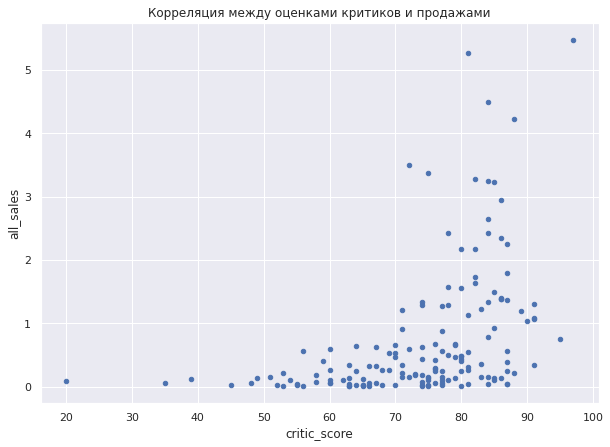

In [42]:
# построим диаграмму рассеяния между оценками критиков и продажами
xone.plot(x='critic_score', y='all_sales', kind='scatter', alpha=1) 
plt.title('Корреляция между оценками критиков и продажами')

# посчитаем коэффициент корреляции
print('Коэффициент корреляции равен', xone['critic_score'].corr(xone['all_sales']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции равен -0.0703839280647581


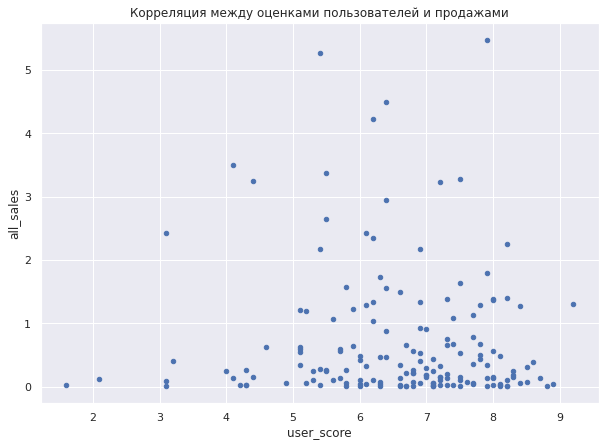

In [43]:
# построим диаграмму рассеяния между оценками пользователей и продажами
xone.plot(x='user_score', y='all_sales', kind='scatter', alpha=1) 
plt.title('Корреляция между оценками пользователей и продажами')

# посчитаем коэффициент корреляции
print('Коэффициент корреляции равен', xone['user_score'].corr(xone['all_sales']))

#### Вывод:

- Коэффициент корреляции, равный 0.41, говорит нам о наличии связи между оценками критиков и продажами, правда, не о слишком сильной. Но, все равно, можно сказать, что, чем лучше оценки критиков, тем больше продажи. То есть, на продажи влияет качество игры.
- Коэффициент корреляции между оценками пользователей и продажами практически равне нулю, что говорит нам о том, что связи между двумя этими величинами нет. 

In [44]:
# посмотрим на коэффициенты корреляции других платформ из топа

for pl in new_platform['platform'].unique():
    if pl == 'XOne':
        continue
    df = new_platform.query('platform == @pl')
    us = df['user_score'].corr(df['all_sales'])
    crit = df['critic_score'].corr(df['all_sales'])
    print(pl)                               
    print(f'Коэффициент корреляции между оценками пользователей и продажами равен', us.round(2))
    print(f'Коэффициент корреляции между оценками критиков и продажами равен', crit.round(2))
    print(' ')

PS4
Коэффициент корреляции между оценками пользователей и продажами равен -0.04
Коэффициент корреляции между оценками критиков и продажами равен 0.4
 
3DS
Коэффициент корреляции между оценками пользователей и продажами равен 0.22
Коэффициент корреляции между оценками критиков и продажами равен 0.31
 
WiiU
Коэффициент корреляции между оценками пользователей и продажами равен 0.41
Коэффициент корреляции между оценками критиков и продажами равен 0.37
 
PS3
Коэффициент корреляции между оценками пользователей и продажами равен -0.17
Коэффициент корреляции между оценками критиков и продажами равен 0.45
 
X360
Коэффициент корреляции между оценками пользователей и продажами равен -0.14
Коэффициент корреляции между оценками критиков и продажами равен 0.53
 
PC
Коэффициент корреляции между оценками пользователей и продажами равен -0.07
Коэффициент корреляции между оценками критиков и продажами равен 0.17
 
PSV
Коэффициент корреляции между оценками пользователей и продажами равен -0.17
Коэффициен

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

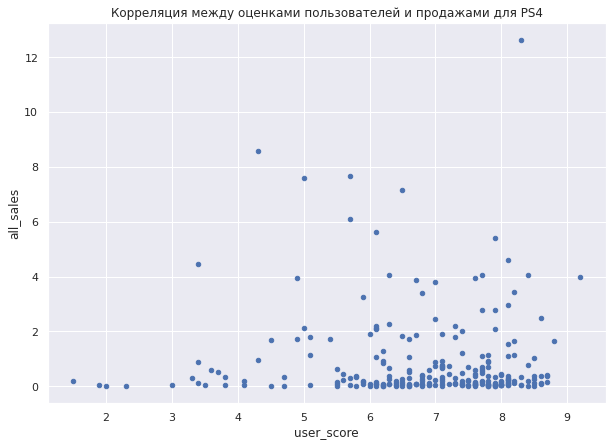

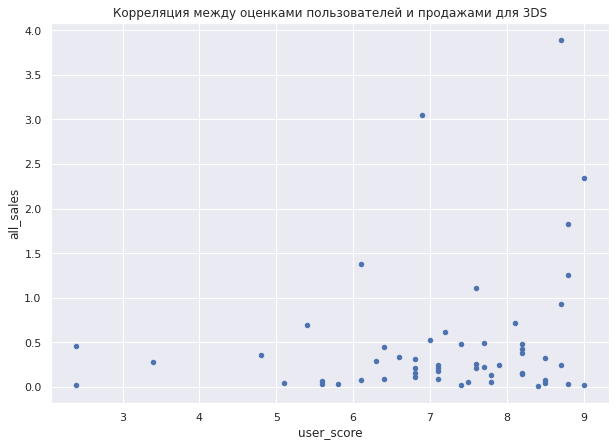

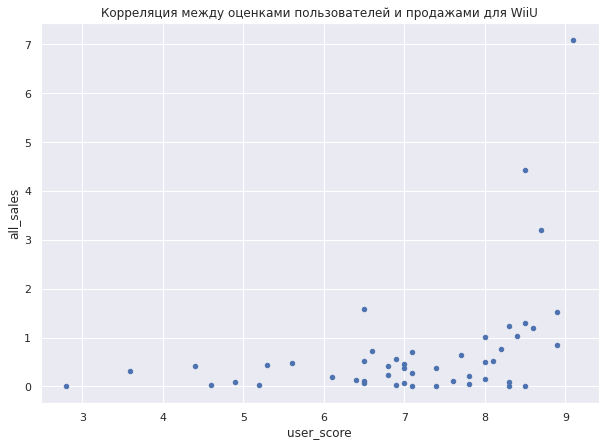

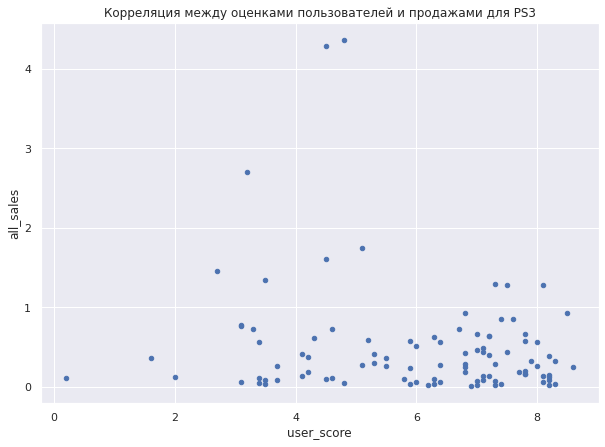

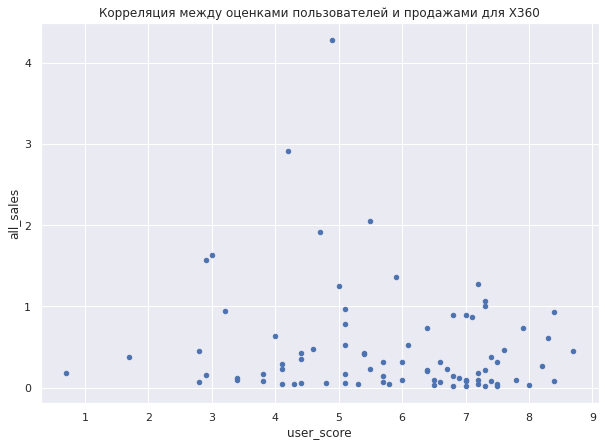

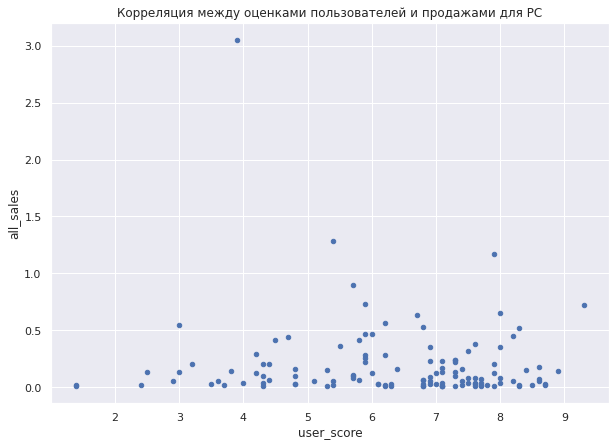

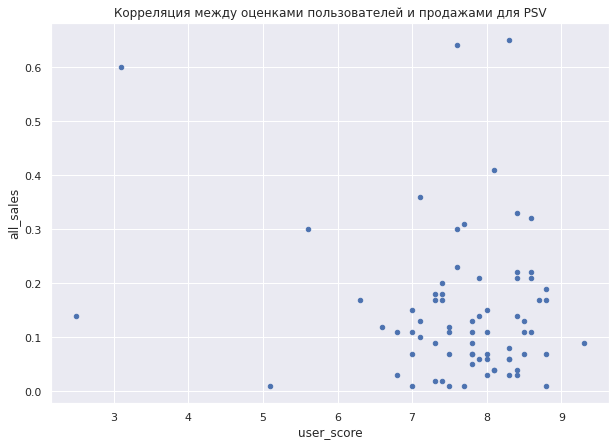

In [45]:
# для наглядности  построим диаграмму рассеяния для платформ (продажи и оценки пользователей)
for pl in new_platform['platform'].unique():
    if pl == 'XOne':
        continue
    df = new_platform.query('platform == @pl')
    df.plot(x='user_score', y='all_sales', kind='scatter', alpha=1) 
    plt.title(f'Корреляция между оценками пользователей и продажами для {pl}')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

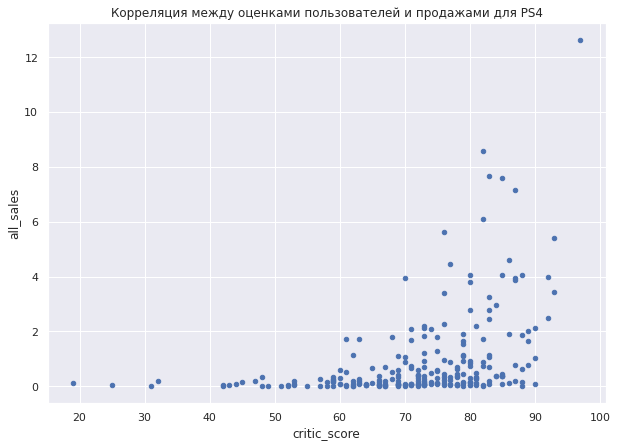

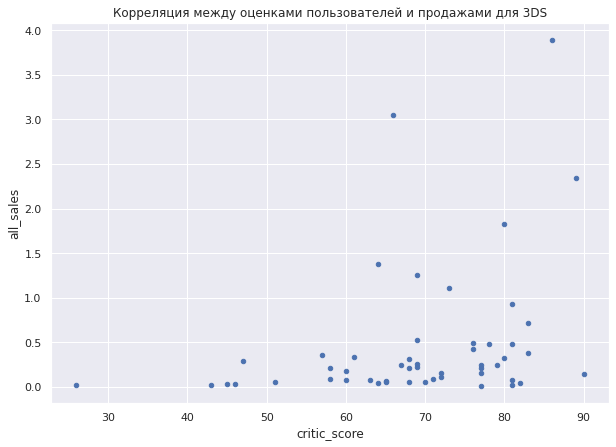

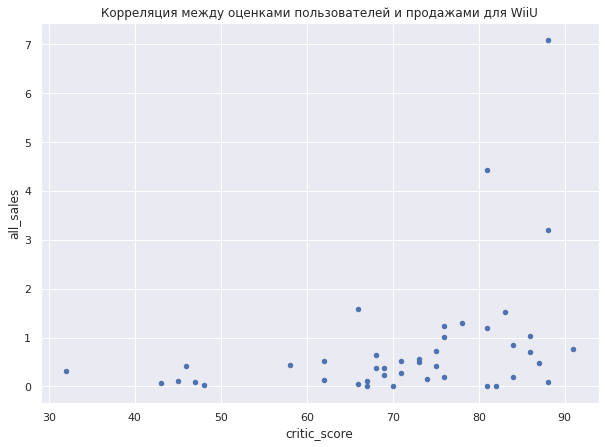

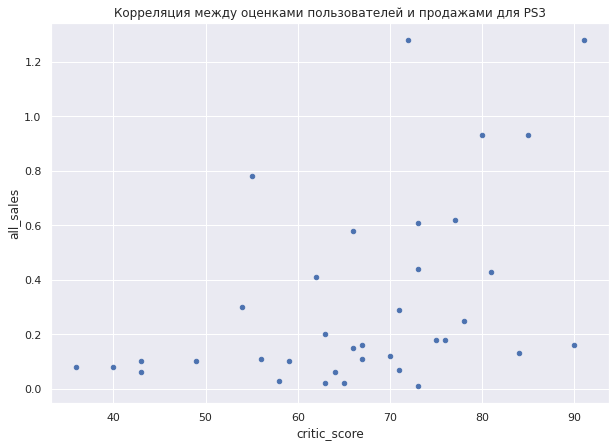

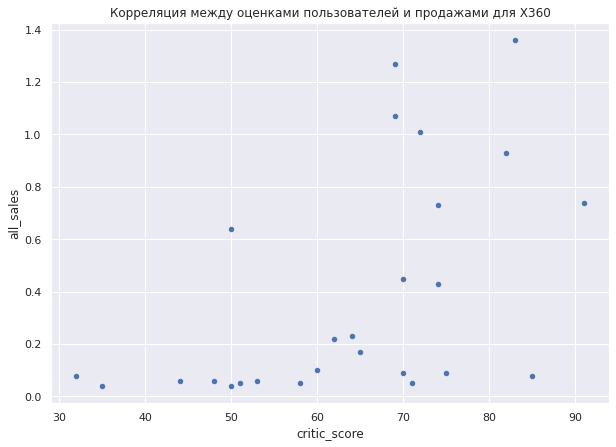

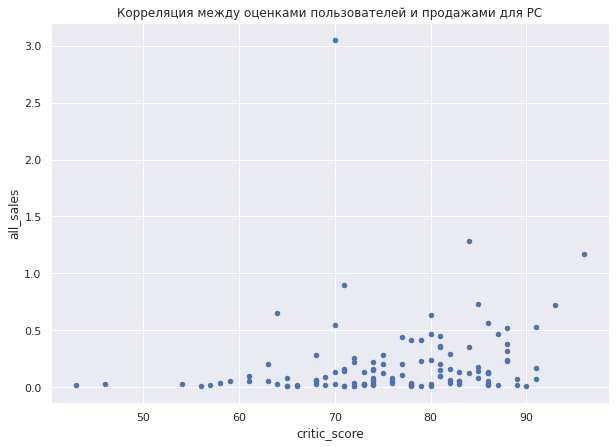

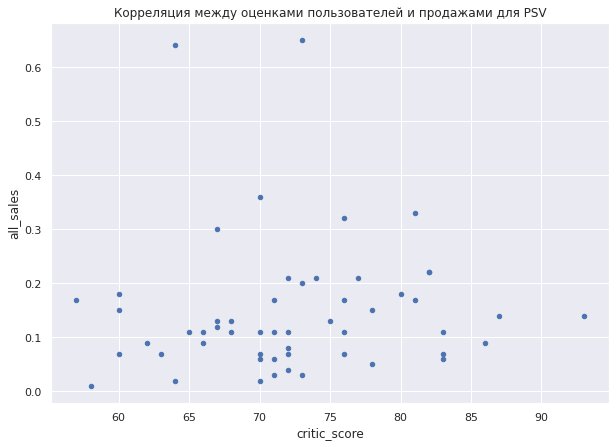

In [46]:
# для наглядности  построим диаграмму рассеяния для платформ (продажи и оценки пользователей)
for pl in new_platform['platform'].unique():
    if pl == 'XOne':
        continue
    df = new_platform.query('platform == @pl')
    df.plot(x='critic_score', y='all_sales', kind='scatter', alpha=1) 
    plt.title(f'Корреляция между оценками пользователей и продажами для {pl}')

#### Вывод:

Как мы видим, среди других платформ ситуация похожая:
- На всех платформах наблюдается зависимость между оценками критиков и продажами: где-то больше, где-то меньше, но она присутствует везде.
- На платформах PS4, PSV и PC отсутствует зависимость между оценками пользователей и продажами.
- На платформах 3DS и WiiU присутствует зависимость, при этом на платформе WiiU зависимость между пользовательскими оценками и продажами выше, чем между оценками критиков и продажами.
- Вероятно, пользователи критичнее относятся к играм, чем сами критики (как бы это иронично не звучало). Конечно, от оценок критиков зависят продажи игры, но в какой мере - неизвестно. В данных присутствуют игры, которые имею высокие оценки критикоов, но малые продажи (особенно это заметно на графиках для PC, PS4 и XOne).
- На продажи могут влиять многие факторы, а какие именно - невозможно оценить из-за ограниченности имеющихся данных.

### Игры по жанрам

In [47]:
# создадим сводную таблицу 
genre_pivot = pd.pivot_table(data, index = ['genre'], values='all_sales', aggfunc='sum')
genre_pivot.sort_values(by='all_sales', ascending=False).head(5) # проверим

,all_sales
genre,
Action,1646.62
Sports,1266.74
Shooter,976.24
Role-Playing,895.60
Misc,776.53


In [48]:
genre_pivot.sort_values(by='all_sales', ascending=False).tail(5) # посмотрим на самые непопулярные жанры

,all_sales
genre,
Fighting,411.05
Simulation,381.84
Adventure,213.99
Strategy,170.45
Puzzle,159.90


Видно, что самый популярный жанр за всю историю - Action. 

В пятерку лучших также входят: спортивные игры, шутеры, ролевые игры и "разнообразное".

Пазлы и стратегии считаются самыми непопулярными жанрами, скорее всего, из-за того, что в них нужна усидчивость и терпение. Хотя для меня все равно удивительно, что стратегии настолько непопулярны.

Посмотрим на популярные и непопулярные жанры по актуальному периоду (2014-2016).

In [49]:
# самые популярные и непопулярные игры за 2014-2016 год
new_genre_pivot = data.query('year_of_release > 2013')
new_genre_pivot = pd.pivot_table(new_genre_pivot, index = ['genre'], 
                                 values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
display(new_genre_pivot.head())
display(new_genre_pivot.tail())

,all_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55


,all_sales
genre,
Platform,18.09
Adventure,17.55
Simulation,13.13
Strategy,3.96
Puzzle,2.21


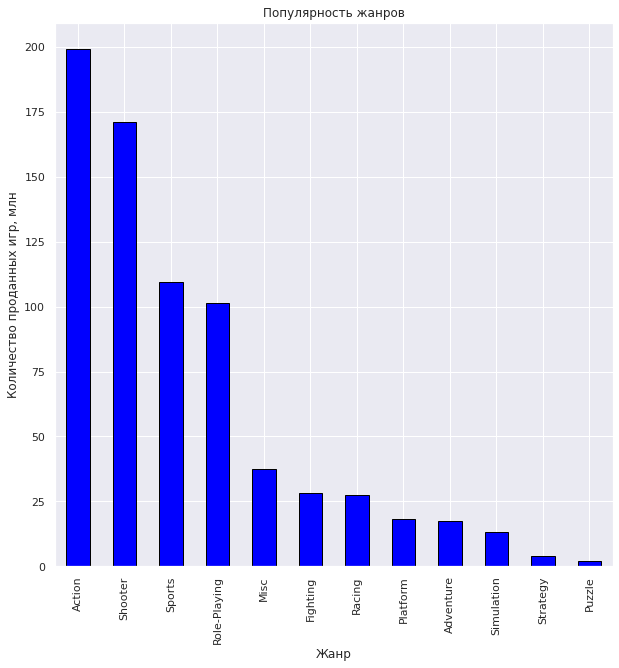

In [50]:
# построим график для наглядности

new_genre_pivot.plot.bar(figsize=(10, 10), color='blue', edgecolor='black', legend=False)
plt.title('Популярность жанров')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн')
plt.show()

В целом, ситуация не изменилась. Топ 5 самых популярных жанров остался неизменных, также как и 2 самых непопулярных жанра.

Но есть предположение, что данные жанры имеют высокие продажи в связи с тем, что игр данного жанра выпускается большое количество. Вдруг на самом деле все эти игры имеют небольшой коммерческий успех.

In [51]:
# возьмем таблицу с играми, которые вышли в период с 2014 по 2016 года
new_genre = data.query('year_of_release > 2013')

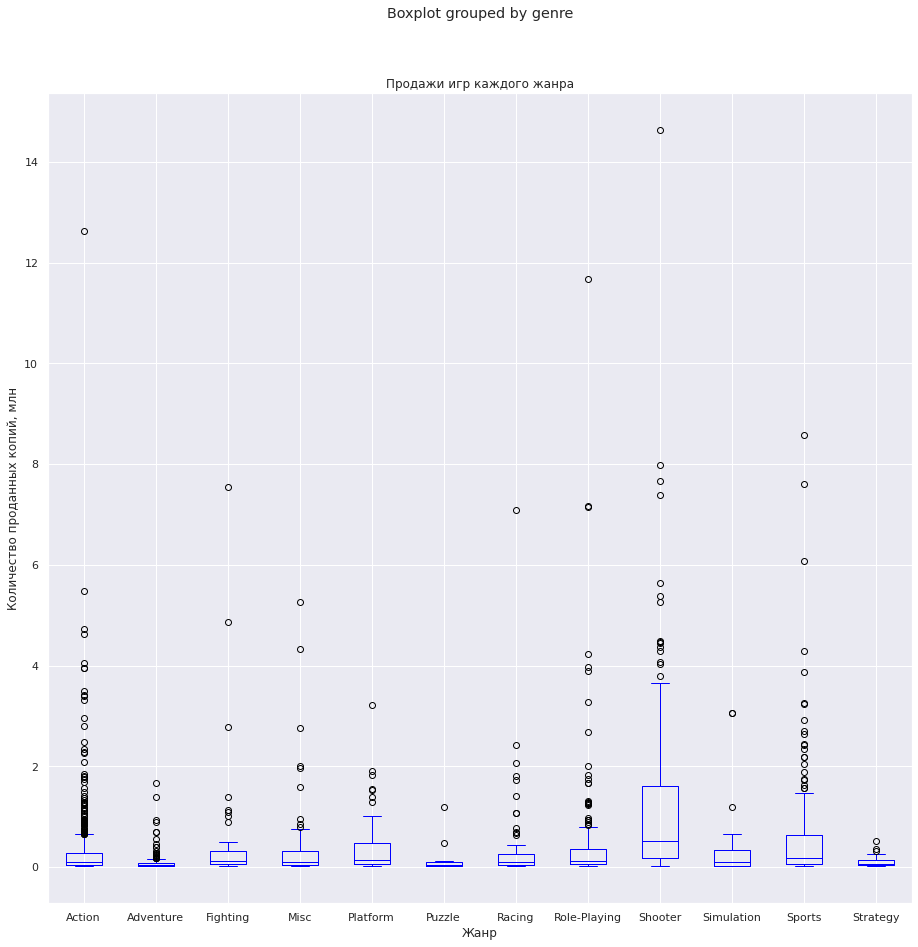

In [52]:
# построим диаграммы размаха для всех жанров
# построим и сравним графики для каждой платформы в 100% масштабе
new_genre.boxplot(column = 'all_sales', by='genre', figsize = (15, 15), color='blue')
plt.title('Продажи игр каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.show()

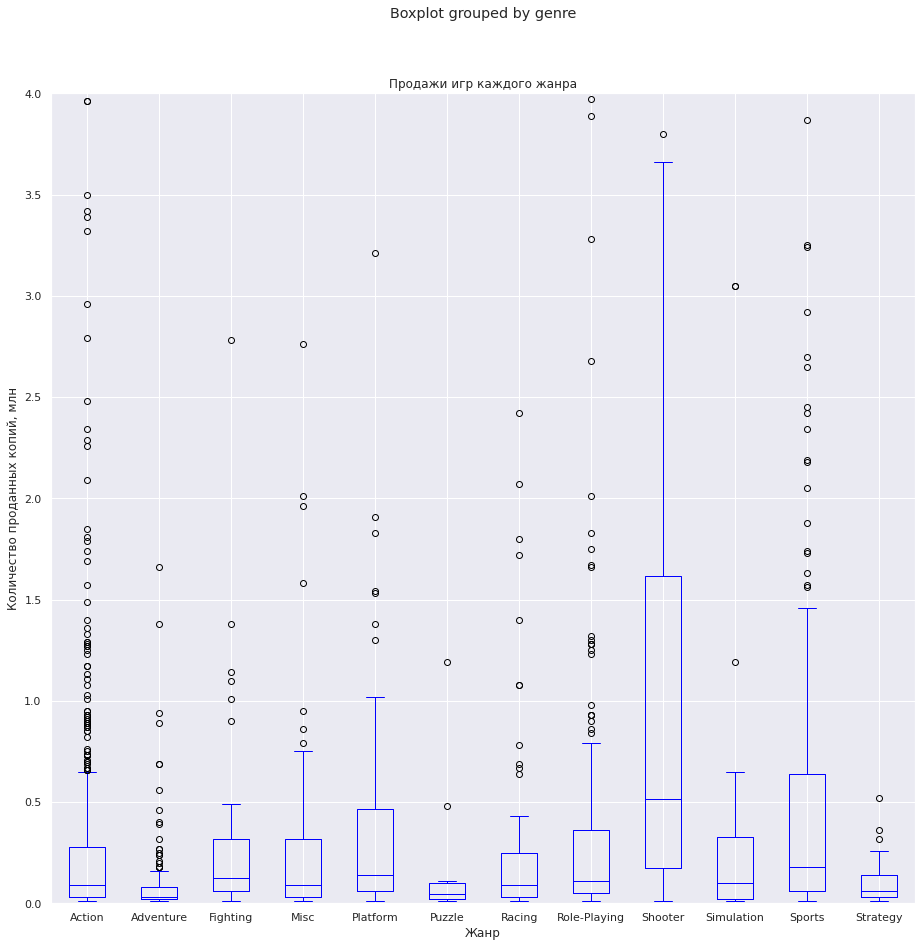

In [53]:
# построим и сравним графики для каждой платформы так, чтобы отчётливо было видно 75% квантиль и медиану
new_genre.boxplot(column = 'all_sales', by='genre', figsize = (15, 15), color='blue')
plt.title('Продажи игр каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.ylim(0, 4)
plt.show()

- Судя по графику, в топ самых непопулярных и неприбыльных жанров, наравне с пазлами и стратегиями, можно добавить и приключения (Adventure). Медианное значение этих жанров находится в диапазоне от 0.05 до 0.1. К тому же 75% квантиль (соответсвенно, и большинство игр) не превышает 0.2.
- Жанр экшн на удивление не такой уж и прибыльный. Медианное значение данного жанра равно примерно 1.5, а 75% квантиль - не доходит и до 0.3. Получается, свою "популярность" он получил лишь за счет каких-то отдельных "выстреливших" игр (аномальные значения на графике).
- По итогу, более менее стабильные и прибыльные жанры: shooter, sports и platform.

#### Вывод:
- Самые прибыльными жанрами как за всё время, так и за актуальный период, являются: шутера и спортивные симуляторы и platform. Экшн и шутера являются наиболее перспективными для разработки жанрами, так как их востребованность не падает.
- Самыми непопулярными жанрами являются стратегии, пазлы и приключения.

### Вывод

Проведя исследовательский анализ, были сделаны следующие выводы:
1. Данные до 1994 года были отброшены, так как до этого года выпускалось малое количество игр, а после пошел рост игровой индустрии.
2. Пик игровой индустрии пришелся на 2008-2009 года, а далее пошел спад. Думаю, что это связано с тем, что разработка игр на современные платформы сложнее и занимает больше времени.
3. Было выявлено топ-6 платформ за всю историю: PS, PS2, PS3, X360, Wii и DS. Было выявлено, что среднее время "жизни" платформы примерно 10-12 лет, а пик популярности приходится за 3-4 года до спада. Спад данных платформ был в начале 2010 годов, и к 2013 году практически все эти платформы потеряли свою актуальность. 
4. Исходя из прошлого пункта, был выбран актуальный период: с 2014 по 2016 год.
5. Судя по графикам, продажи растут у двух платформ: PS4 и XOne. Думаю, что они являются самыми потенциально прибыльными. Стоит также отметить платформы 3DS и PC: у первой платформы за 2015 год около 28 млн продаж, поэтому можно ожидать, что и в 2016, и в 2017 у неё будут тоже высокие продажи. Но тем не менее, они постепенно падают. Продажи игр на персональный компьютер падают, но, тем не менее, данная платформа остается востребована уже несколько десятилетий, поэтому она тоже является потенциально прибыльной, пусть и не имея огромных продаж.
6. Были изучены продажи игр по каждой платформе. Медианные значения распределились следующим образом: 
- PS4 - 170 тыс
- 3DS - 90 тыч
- XOne - 200 тыс
- WiiU - 190 тыс
- PC - 70 тыс
- PSV - 40 тыс
7. Самые прибыльными жанрами как за всё время, так и за актуальный период, являются: шутера и спортивные симуляторы и platform. Экшн и шутера являются наиболее перспективными для разработки жанрами, так как их востребованность не падает. 
8. Самыми непопулярными жанрами являются стратегии, пазлы и приключения.
9. Было выявлено, что количество продаж зависит от оценок критиков, нежели от оценок пользователей. Но нельзя сказать, что зависимость уж очень большая. Возможно, на это влияют многие другие факторы, а какие именно - невозможно оценить из-за ограниченности имеющихся данных.

## Портрет пользователя каждого региона (NA, EU, JP)

In [54]:
# создадим функцию для построения графиков

def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
   
      
    labels_c=sales.platform
    colours = {'Wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'lightsteelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'Fuchsia', '2600':'C15', 'PSP':'C48', 
               'XOne':'LimeGreen',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

In [55]:
data_games = data.copy()

data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

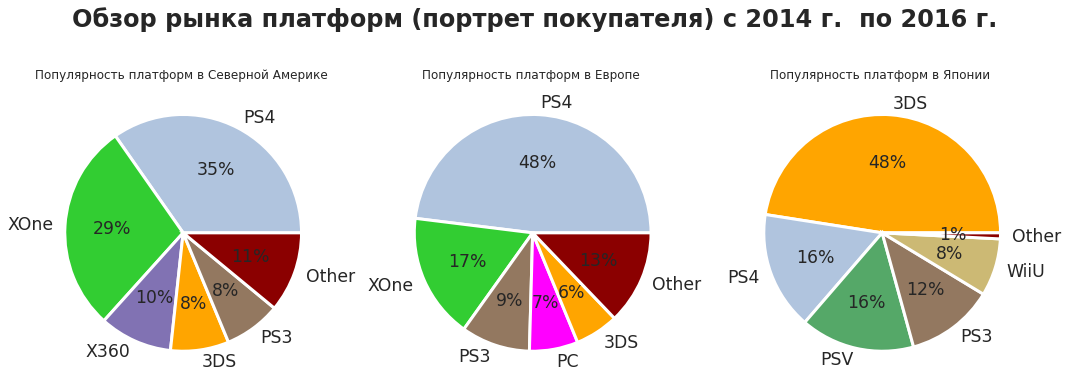

In [56]:
# # построим графики для обзора рынка платформ с 2014 по 2016

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

Самые популярные платформы в Северной Америке - PS4 и XOne. Их популярность находится примерно на одном уровне.

В Европе эти две платформы тоже самые популярные, но игры для PS4 имеют почти в 3 раза больше продаж, чем игры для XOne.

В Японии несомненным лидером является платформа 3DS, далее идут платформы компании Sony, но они сильно отстают.

#### Вывод:
- В Америке самые популярные платфорсы - PS4 и XOne.
- В Европе - PS4, XOne отстает довольно сильно.
- А вот в Японии - 3DS имеет сильный отрыв от ближайших конкруентов (PSV и PS4).
- Можно сделать вывод, что в Америке между собой соревнуются Sony и Microsoft, в Европе выбирают наиболее популярную PS4. В Японии ситуация иная: там популярны портативные приставки (3DS, PSV).

### Самые популярные жанры

In [57]:
# создадим сводные таблицы для каждого региона
genre_na = pd.pivot_table(new_platform, index='genre', values='na_sales', 
                          aggfunc='sum').sort_values(by='na_sales', ascending=False)

genre_eu = pd.pivot_table(new_platform, index='genre', values='eu_sales', 
                          aggfunc='sum').sort_values(by='eu_sales', ascending=False)

genre_jp = pd.pivot_table(new_platform, index='genre', values='jp_sales', 
                          aggfunc='sum').sort_values(by='jp_sales', ascending=False) 


In [58]:
# выведем их на экран

display(genre_na.head()) # na

display(genre_eu.head()) # eu

display(genre_jp.head()) # jp

,na_sales
genre,
Shooter,79.02
Action,72.10
Sports,45.98
Role-Playing,33.47
Misc,13.59


,eu_sales
genre,
Action,74.01
Shooter,65.52
Sports,45.36
Role-Playing,28.17
Racing,14.13


,jp_sales
genre,
Role-Playing,31.16
Action,29.38
Fighting,6.37
Misc,5.59
Shooter,4.87


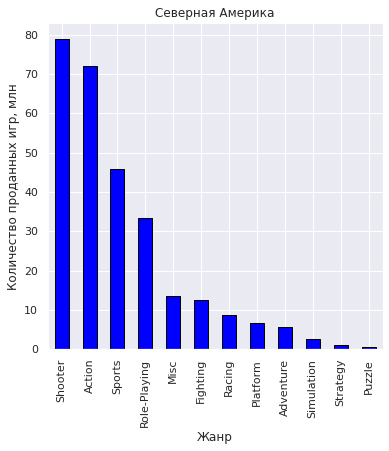

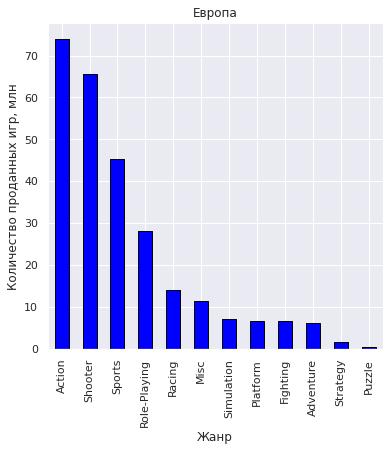

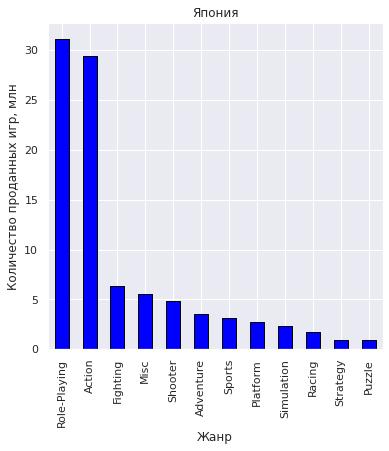

In [59]:
# построим графики для наглядности

genre_na.plot.bar(figsize=(6, 6), color='blue', edgecolor='black', legend=False)
plt.title('Северная Америка')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн')
plt.show()

genre_eu.plot.bar(figsize=(6, 6), color='blue', edgecolor='black', legend=False)
plt.title('Европа')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн')
plt.show()

genre_jp.plot.bar(figsize=(6, 6), color='blue', edgecolor='black', legend=False)
plt.title('Япония')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн')
plt.show()

#### Вывод
- В целом, в Америке и Европе популярны одни и те же жанры: экш, шутер, спортивные симуляторы и ролевые игры.
- В Японии популярными являются ролевые игры и экш. 
- Игры жанра экшн и ролевые игры популярны во все регионах.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [60]:
# создадим сводные таблицы по каждому региону

rating_na = pd.pivot_table(new_platform, index='rating', 
                                      values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

rating_eu = pd.pivot_table(new_platform, index='rating', 
                                      values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

rating_jp = pd.pivot_table(new_platform, index='rating', 
                                      values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [61]:
# выведем на экран 

display(rating_na)

display(rating_eu)

display(rating_jp)

,na_sales
rating,
M,96.42
unknown,64.70
E,50.59
T,38.95
E10+,31.32


,eu_sales
rating,
M,93.44
unknown,58.79
E,57.64
T,34.07
E10+,24.15


,jp_sales
rating,
unknown,56.54
T,14.78
E,8.94
M,8.01
E10+,4.46


#### Вывод
- В Америке и Европе самые популярные игры имеют категорию М, то есть для взрослых. Их продажи почти в два раза больше, чем у игр с категорией Е (для всех).
- в Японии игры категории М не пользуются большой популярность. Для азиатского игра намного выгоднее выпускать игры для подростков и детей.

### Вывод

1. Самые популярные платформы в америке и европе - PS4 и XOne, причем, что в европе предпочтение все равно отдаётся платформе от компании Sony. Суммарные продажи игр на эти платформы составляют основную часть проданных игр.
2. В Японии популрность имеют портативные приставки: 3DS и PSV. PS4 тожде популярно, но не так, как на западе. 
3. Во всех регионах популярны жанры action и role-paying. В америке и европе также поплярность имеют спортивные симуляторы и шутеры, а в японии драки и "разнообразные".
4. Самые поплуярные игры, проданные в америке и европе, имеют категорию М (для взрослых), а в Японии Т (для подростков) и Е (для всех).
5. Думаю, что японский рынок игровой индустрии направлен больше на детей: этим можно объясить популярность портативных приставок. Тем самым, можно сказать, что для получения наибольших продаж необходимо разрабатывать игры в зависимости от региона.

## Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC

Необходимо проверить гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы:
- H0: Средняя оценка пользователей для игр на XOne = средняя оценка пользователей для игр на PC
- H1: Средняя оценка пользователей для игр на XOne != средняя оценка пользователей для игр на PC

Статистическу значимость (alpha) примем за 0.05 (5%).

Будем проверять двустороннюю альтернативную гипотезу.

In [62]:
# подготовим данным, удалим строки с пропущенными значениями в столбце user_score
xone = new_platform.query('platform == "XOne"')
pc = new_platform.query('platform == "PC"')

xone = xone['user_score'].dropna() # первая генеральная выборка
pc = pc['user_score'].dropna() # вторая генеральная выборка

In [63]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(xone, pc) # проводим ttest  с альтернативной двусторонней гипотезой 

print('Pvalue равно:', results.pvalue)
print('Pvalue - вероятность получить наблюдаемое на выборке значение или более далёкое от предположенного в H0')

# далее сравним pvalue с уровнем статистической значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Pvalue равно: 0.10450507919348415
Pvalue - вероятность получить наблюдаемое на выборке значение или более далёкое от предположенного в H0
Нет оснований отвергнуть нулевую гипотезу


#### Вывод

Полученное значение p-value говорит о том, что хотя средние оценки пользователей для PC и XOne неодинаков, с вероятностью в почти 10.5% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
XOne приналежит Microsoft, как и большинство операционных систем для PC. Скорее всего, здесь есть связь.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports

Необходимо проверить гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы:

- H0: Средняя оценка пользователей для игр жанра Action = средняя оценка пользователей для игр жанра Sports
- H1: Средняя оценка пользователей для игр жанра Action != средняя оценка пользователей для игр жанра Sports

Статистическу значимость (alpha) примем за 0.05 (5%).

Будем проверять двустороннюю альтернативную гипотезу.

In [64]:
# подготовим данным, удалим строки с пропущенными значениями в столбце user_score
action = new_platform.query('genre == "Action"')
sports = new_platform.query('genre == "Sports"')

action = action['user_score'].dropna() # первая генеральная выборка
sports = sports['user_score'].dropna() # вторая генеральная выборка

In [65]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(action, sports) # проводим ttest  с альтернативной двусторонней гипотезой 

print('Pvalue равно:', results.pvalue)

# далее сравним pvalue с уровнем статистической значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Pvalue равно: 5.345452934773537e-19
Отвергаем нулевую гипотезу


#### Вывод

Нулевую гипотезу отвергаем.
Есть основания говорить о значимом различии между оценками среди этих платформ.

### Вывод

В ходе данного пункта были проверены следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Исходя из проверки, можно сказать:
- Нет оснований делать вывод о значимом разлиичии в оценках между платформами.
- Есть основания говорить о значимом различии в рейтингах среди этих жанров.

## Общий вывод

### Вывод по пункту 1

Произвелась выгрузка данных, была просмотрена основная информация:
1. Название столбцов приведены к единому формату.
2. Видно, что в начальных присутствует достаточно большое количество пропусков.
3. Необходимо привести к формату int столбец 'year_of_release'.
4. Столбец critic_score следует привести к типу int.
5. Столбец user_score следует привести к типу float.

### Вывод по пункту 2

По итогам предобработки данных:

1. Произвелось преобразование типов данных:
- столбец 'year_of_release' к типу int
- столбец 'user_score' к типу float
- столбец 'critic_score' к типу int
2. Было выявлено наличие пропусков. Большинство пропусков было решено оставить, так как заменить пропуски нечем. Они могли появиться в следствие неправльной записи данных / загрузке, выгрузке или сохранении данных / технической ошибки.
3. В столбце 'user_score' присутствовало значение 'tbd', что означает 'будет определено'. Вообще, не все игры оцениваются критиками или пользователями, не для всех игр дают оценки. К тому же, этот процесс достаточно длительный. Данные значения были заменены на NaN, так как заменить их какими-то значениями не представляется возможным.
4. Пропуски в столбце 'reting' были заменены на значение моды рейтинга для каждого жанра. 
5. Явных дубликатов и аномальных значений в данных не выявлено. Неполные дубликаты были удалены.

### Вывод по пункту 3

Проведя исследовательский анализ, были сделаны следующие выводы:
1. Данные до 1994 года были отброшены, так как до этого года выпускалось малое количество игр, а после пошел рост игровой индустрии.
2. Пик игровой индустрии пришелся на 2008-2009 года, а далее пошел спад. Думаю, что это связано с тем, что разработка игр на современные платформы сложнее и занимает больше времени.
3. Было выявлено топ-6 платформ за всю историю: PS, PS2, PS3, X360, Wii и DS. Было выявлено, что среднее время "жизни" платформы примерно 10-12 лет, а пик популярности приходится за 3-4 года до спада. Спад данных платформ был в начале 2010 годов, и к 2013 году практически все эти платформы потеряли свою актуальность. 
4. Исходя из прошлого пункта, был выбран актуальный период: с 2014 по 2016 год.
5. Судя по графикам, продажи растут у двух платформ: PS4 и XOne. Думаю, что они являются самыми потенциально прибыльными. Стоит также отметить платформы 3DS и PC: у первой платформы за 2015 год около 28 млн продаж, поэтому можно ожидать, что и в 2016, и в 2017 у неё будут тоже высокие продажи. Но тем не менее, они постепенно падают. Продажи игр на персональный компьютер падают, но, тем не менее, данная платформа остается востребована уже несколько десятилетий, поэтому она тоже является потенциально прибыльной, пусть и не имея огромных продаж.
6. Были изучены продажи игр по каждой платформе. Медианные значения распределились следующим образом: 
- PS4 - 170 тыс
- 3DS - 90 тыч
- XOne - 200 тыс
- WiiU - 190 тыс
- PC - 70 тыс
- PSV - 40 тыс
7. Самые прибыльными жанрами как за всё время, так и за актуальный период, являются: шутера, спортивные симуляторы и platform. Экшн и шутера являются наиболее перспективными для разработки жанрами, так как их востребованность не падает. 
8. Самыми непопулярными жанрами являются стратегии, пазлы и приключения.
9. Было выявлено, что количество продаж зависит от оценок критиков, нежели от оценок пользователей. Но нельзя сказать, что зависимость уж очень большая. Возможно, на это влияют многие другие факторы, а какие именно - невозможно оценить из-за ограниченности имеющихся данных.

### Вывод по пункту 4

1. Самые популярные платформы в америке и европе - PS4 и XOne, причем, что в европе предпочтение все равно отдаётся платформе от компании Sony. Суммарные продажи игр на эти платформы составляют основную часть проданных игр.
2. В Японии популрность имеют портативные приставки: 3DS и PSV. PS4 тожде популярно, но не так, как на западе.
3. Во всех регионах популярны жанры action и role-paying. В америке и европе также поплярность имеют спортивные симуляторы и шутеры, а в японии драки и "разнообразные".
4. Самые поплуярные игры, проданные в америке и европе, имеют категорию М (для взрослых), а в Японии Т (для подростков) и Е (для всех).
5. Думаю, что японский рынок игровой индустрии направлен больше на детей: этим можно объясить популярность портативных приставок. Тем самым, можно сказать, что для получения наибольших продаж необходимо разрабатывать игры в зависимости от региона.

### Вывод по пункту 5

В ходе данного пункта были проверены следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Исходя из проверки, можно сказать:
- Нет оснований делать вывод о значимом разлиичии в оценках между платформами.
- Есть основания говорить о значимом различии в рейтингах среди этих жанров.

### Заключение

- Самые потенциально прибыльные платформы - PS4 и XOne. В этот список также можно включить 3DS и PC. PC является популярной платформой уже несколько десятилетий, а 3DS еще имеет хорошие продажи, пусть даже они и падают. 
- Также стоит смотреть в сторону игр жанров Shooter, Sports и Platform. Данные жанры являются самыми прибыльными, так как они имеют достаточно большое количество продаж, а также стабильны на дистанции.
- Стоит отметить, что если целевая аудитория для игры - Азия, то следует продавать игры для портативных игровых консолей, к тому же игры должны быть рассчитаны на детский и подростковый возраста.
- Еще продажи игры зависят от оценок критиков, так что следует продавать игры с высоким рейтингом. Конечно, стоит сказать, что продажи зависят от многих других факторов: длительное ожидание, рекламная компания, высокие ожидания от игры, акции и специальные предложения при продаже игры и тд.